## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\cognorise\tested.csv')

## Exploratory Data Analysis

In [3]:
#view the first few entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Print the number of rows and columns of the dataset
df.shape

(418, 12)

In [5]:
#statistical analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
## Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
## count number of missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The column Age, Fare and Cabin contain missing values

In [8]:
## Number of persons survived

df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

The data indicates that less people are survived

## Data Visualisation

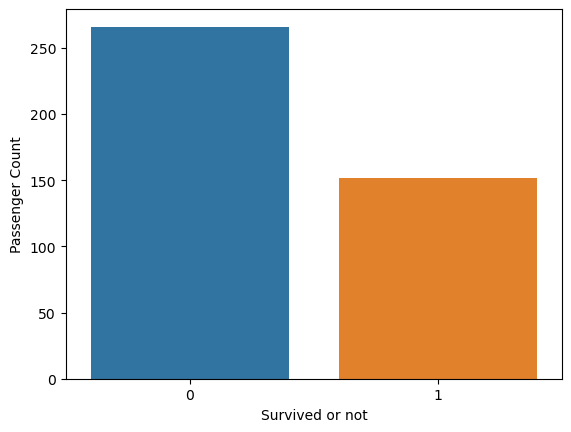

In [9]:
## count plot of number of people survived
sns.countplot(x='Survived', data=df, )
plt.xlabel('Survived or not')
plt.ylabel('Passenger Count')
plt.show()

In [10]:
df.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

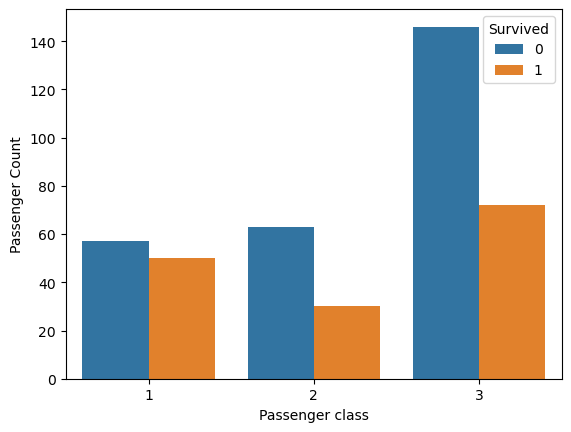

In [11]:
sns.countplot(x='Pclass', data=df,hue='Survived' )
plt.xlabel('Passenger class')
plt.ylabel('Passenger Count')
plt.show()

In [12]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,107
2,93
3,218


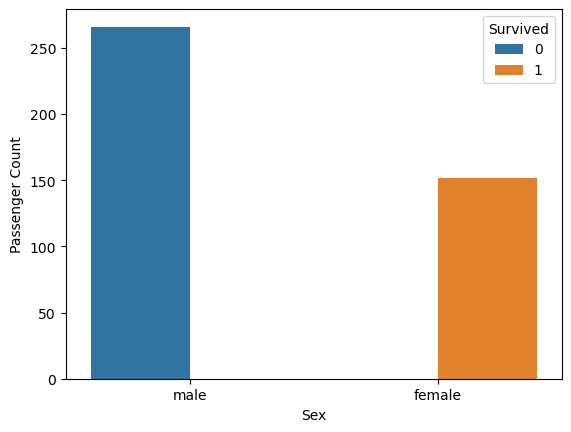

In [13]:
sns.countplot(x='Sex', data=df, hue='Survived' )
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.show()

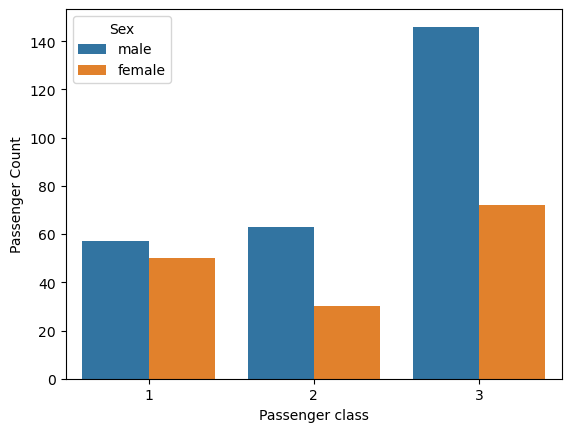

In [14]:
sns.countplot(x='Pclass', data=df,hue='Sex' )
plt.xlabel('Passenger class')
plt.ylabel('Passenger Count')
plt.show()

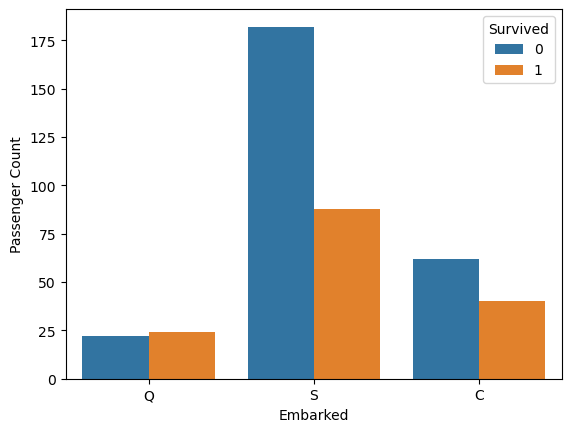

In [15]:
sns.countplot(x='Embarked', data=df, hue='Survived' )
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8620\3237795141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


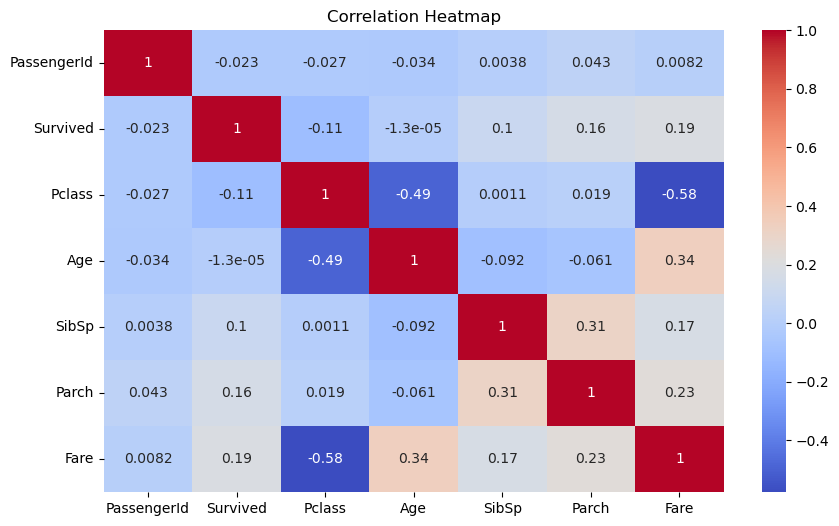

In [16]:
# Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


data preprocessing:

Survived is the target column

Age' and 'Fare' has less number of missing value.So we can impute data on these columns.

As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.

'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.

In [19]:
## Make passenger id as the index column

df.set_index('PassengerId',inplace=True)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df.Fare.value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [22]:
# Impute missing values in the 'Age' columnnwith the mean
data = df
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Impute missing values in the 'Fare' columnn with mean
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [23]:
# Removing the columns Name, Ticket and Cabin from the data

data = data.drop(columns=['Name','Ticket', 'Cabin'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.4+ KB


In [25]:
## Assigning numerical values to Sex and Embarked categories

sex = {"male": 0, "female": 1} 
data['Sex'] = data['Sex'].map(sex) 
  
embarked = {"S": 1, "C": 2, "Q": 3} 
data['Embarked'] = data['Embarked'].map(embarked) 

In [26]:
#Creating dataframe for features
X = data.drop(['Survived'], axis=1) 

#Creating dataframe for target
y = data['Survived']

In [27]:
print(X.shape, y.shape)

(418, 7) (418,)


In [28]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(334, 7) (84, 7) (334,) (84,)


## Feature Scaling

In [29]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

Using two models for classification of fraudulent and non-fraudulent transactions:

1.SVM(Support Vector Machine)

2.KNN(K Nearest neighbors)

In [30]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [31]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.99
Confusion Matrix:
[[50  0]
 [ 1 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



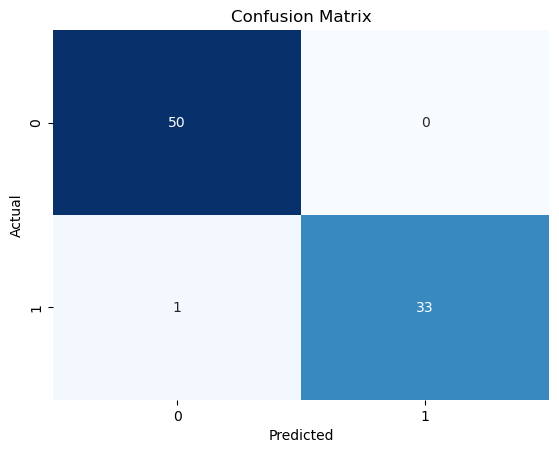

In [32]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [34]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.99
Confusion Matrix:
[[50  0]
 [ 1 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



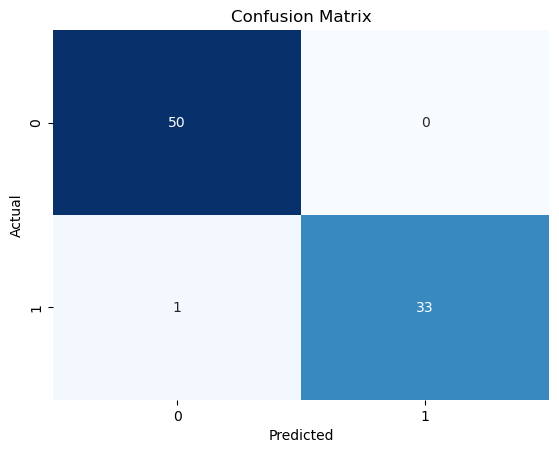

In [35]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Create Decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [37]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



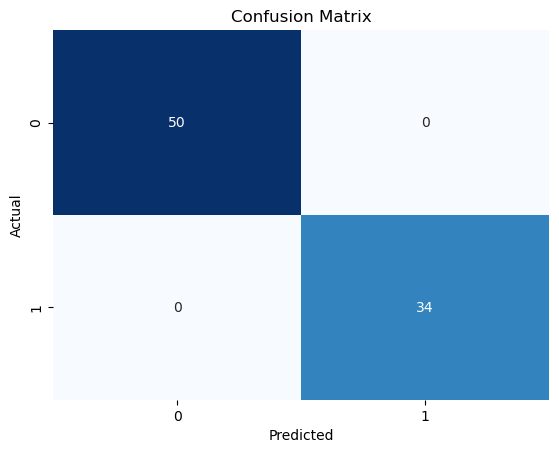

In [38]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision_tree_Accuracy: {dt_accuracy:.2f}')

SVM_Accuracy: 0.99
KNN_Accuracy: 0.99
Decision_tree_Accuracy: 1.00


The model with best accuracy is Decision Tree